<a href="https://colab.research.google.com/github/SofiaPenyaGonzalez/TRABAJOS/blob/main/PR%C3%81CTICA_2_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 2: Redes Neuronas Convolucionales 

**Integrantes:**
*  María García Rodríguez
*  Paloma Moya Tudela
*  Sofía Peña González
*  Elena Peral Pastor


## RESUMEN
En la anterior práctica trabajamos las Redes de Neuronas Artificiales (RNA)con un ejemplo. Utilizando la misma baso de datos, se estudiarán un tipo específico de estructuras de red que la asignatura de “Aprendizaje Automático” nos da a conocer: las Redes de Neuronas Convolucionales (CNN).

Por tanto, este segundo trabajo irá dirigido a profundizar en el funcionamiento de estas redes. Será interesante comparar los resultados obtenidos en ambas prácticas, con el fin de averiguar - de manera práctica - las diferencias entre ambos. De esta forma, al final del estudio seremos capaces de identificar los casos de uso óptimo para cada una de las redes.

## ÍNDICE
* Introducción
* Resolución
* Conclusiones
* Reflexiones
* Referencias Bibliográficas

## INTRODUCCIÓN
En la 'Práctica 1' se mencionaron tanto los aspectos más relevantes de las Redes de Neuronas Artificiales, como su semejanza con la neurología biológica; y se dio a entender el gran impacto que la Inteligencia Artificial (IA) está cobrando en nuestras vidas. Por consiguiente, y con el fin de no ser repetitivos, únicamente presentaremos en otro estilo de red neuronal: la Red de Neuronas Convolucionales.

Este proyecto volverá a examinar los productos de la tienda de moda online alemana especializada en ventas de ropa y zapatos 'Zalando' (www.zalando.com).

Este estudio se centrará en entender el comportamiento de una Red de Neuronas Convolucionales. Asimismo, servirá de gran ayuda en la comprensión de sus similitudes y diferencias con una Red de Neuronas Artificiales como aquella de la práctica previa.

## RESOLUCIÓN
El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

### PROBLEMA:

Reconocer y clasificar imágenes de ropa - en escala de grises - en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
Crear un modelo de Red de Neuronas COnvolucionales en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST - precargado en Keras - y que ya se ha utilizado para la 'Prática 1'.
Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST en baja resolución (28 x 28 píxeles): artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.
Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código. Sin embargo, antes de comenzar importemnos qyuras y el resto de librerías necesarias para la red neuronal, asegurando que es la versión 2.0.0 (o superior) de TensorFlow.



### **Cuestiones a tener en cuenta:**


1.   Importar todas las librerías
2.   Aregurarnos de que estamos utilizando la versión 2.0.0 o superior de TensorFlow
3. Cargar  los  datos  de  entrenamiento  y  de  Test  a  partir  de `keras.datasets.fashion_mnist `
4. La clasificación corresponde, según el código numérico de clase, a: 

>>>>>>| *CLASE* | *PRENDA* |
|-----------|------------|
| 0         | T-shirt    |
| 1         | Trouser    |
| 2         | Pullover   |
| 3         | Dress      |
| 4         | Coat       |
| 5         | Sandal     |
| 6         | Shirt      |
| 7         | Sneaker    |
| 8         | Bag        |
| 9         | Ankle boot |

5. Es una buena práctica analizar si los datos tienen la forma esperada 
6. Durante una posible fase de pre procesado de datos, analizar el uso de la función de keras `keras.layers.Flatten() `










In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# 2. Imprimir versión de TensorFlow
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.9.0
GPU Available: []
2.9.2


A continuación, cargamos el conjunto de datos MNIST en Keras con el que vamos a trabajar en esta prática.

In [3]:
# 3.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:

* `train_images` y `train_labels` son el conjunto de entrenamiento (los datos de los que aprenderá el modelo).
* `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
* Las imágenes están codificadas como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1)

>>>>>>| *CLASE* | *PRENDA* |
|-----------|------------|
| 0         | T-shirt    |
| 1         | Trouser    |
| 2         | Pullover   |
| 3         | Dress      |
| 4         | Coat       |
| 5         | Sandal     |
| 6         | Shirt      |
| 7         | Sneaker    |
| 8         | Bag        |
| 9         | Ankle boot |

Como los Class names no están incluidos los podremos a mano en el siguiente código:

In [4]:
# 4. Clasificación
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Una vez tenemos los datos preparados, se puede proceder a revisar los datos de entrenamiento.

In [5]:
# 5. Pre-procesamiento de datos
print(train_images.shape)

(60000, 28, 28)


Esto nos indica que el 'Dataset' de los datos de entrenamiento contiene 60K imágenes de 28x28, tal y como indica el enunciado. Hagamos lo mismo con los datos correspondientes a las imágenes de 'test':

In [6]:
print(test_images.shape)

(10000, 28, 28)


De esta manera, apreciamos que se trata de un array de 10K imágenes de 28x28.

A continución, veamos las imágenes de otra forma. Por ejemplo, representemos la matriz de la imagen correspondiente a la posición 0 del array de las imágenes de entrenamiento:

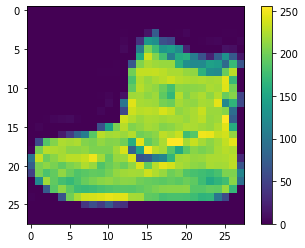

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Una vez se han comprobado las dimensiones de los arrays que se necesitarán, y se tiene clara la estructura de los datos de entrada, nos encontramos con un problema: se observa que los valores oscilan en un rango entre 0 y 250. Sin embargo, si se desea aplicarlos a la red neuronal convolucional, deben ser transformados a valores entre 0 y 1. De esta forma, nos aseguramos de que los datos de entrenamiento y de test se hayan normalizado, y puedan ser porcesados de la misma manera. Arreglémoslo de la siguiente forma:

In [8]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)


Volvamos a mostrar la imagen anterior. Esta vez, los valores se presentarán en el rango [0,1], debido a la normalización de los datos previamente realizada:

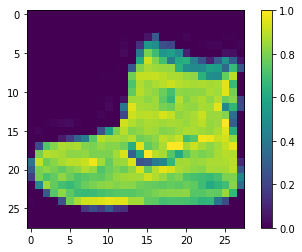

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

A su vez, existe la posibilidad de visalizar las imágenes en su forma matricial. Utilicemos como ejemplo la imagen correspondiente a la posición 2000 del array de los datos de entrenamiento.

In [10]:
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Simula la silueta de un 'sneaker'; así que, comprobémoslo con su correspondiente imagen asociada. Cabe destacar que observamos que los valores seguirán estando entre 0 y 1:

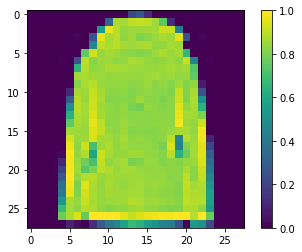

In [11]:
plt.figure()
plt.imshow(train_images[2000])
plt.colorbar()
plt.grid(False)
plt.show()

Por último, antes de comenzar con la red neuronal convolucional, incluimos una representación de los 10 primeros elementos con sus correspondientes etiquetas. De esta forma, nos aseguramos de que el 'Dataset' sea correcto.

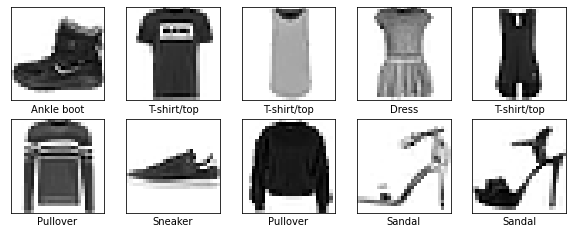

In [12]:

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labels[i]])
plt.show()

### **Cuestiones para implementar y responder**

**1. Configurar y entrenar los siguientes modelos de red de neuronas convolucionales, analizando y reflexionando sobre los resultados:** 

| *Casos* | *Número de filtros 1ª capa convolucional* | *Tamaño ventana 1ª capa convolucional* | *Función activación 1ª capa convolucional* | *Padding*| *Ventana 1ª capa pooling* | *Número de filtros 2ª capa convolucional* |*Tamaño ventana 2ª capa convolucional* | *Función activación 2ª capa convolucional* | *Padding*| *Ventana 2ª capa pooling* | *Capa Flatten* | *Función Activación ultima capa densa* |*Función Activación penúltima capa densa* | *Optimizador*| *Funcion de Pérdida*| *Métrica*| *Nº de iteraciones*|
|-----------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
| Caso 1         | 32   | 5x5 | relu | -| 2x2 | 64 | 5x5 | relu | - | 2x2 | -| softmax| -| sgd|sparse_categorical_crossentropy|accuracy|5|
| Caso 2         | 64|7x7|relu|same|2x2|128|3x3|relu|same|2x2|-|softmax|65|sgd| sparse_categorical_crossentropy|accuracy|5|
| Caso 3         | 64|7x7|relu|same|2x2|128|3x3|relu|same|2x2|-|softmax|65|adam| sparse_categorical_crossentropy|accuracy|5|



**Caso 1**

In [13]:
# CREAR EL MODELO DE RED NEURONAL CNN:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1.add(Flatten()) # Flatten, no es una capa, solo aplana

model1.add(Dense(10, activation='softmax')) # Última capa densa

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

history = model1.fit

model1.fit(train_images, train_labels,
           epochs=5)

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 90s 47ms/step - loss: 0.8419 - accuracy: 0.6987
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.5145 - accuracy: 0.8150
Epoch 3/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.4473 - accuracy: 0.8424
Epoch 4/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.4127 - accuracy: 0.8544
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.4144 - accuracy: 0.8541


**Caso 2**

In [14]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2.add(Flatten()) # Flatten, no es una capa, solo aplana

model2.add(Dense(65,activation='relu')) # Penúltima capa densa
model2.add(Dense(10, activation='softmax')) # Última capa densa

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

history = model2.fit

model2.fit(train_images, train_labels,
           epochs=5)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 273s 145ms/step - loss: 0.7678 - accuracy: 0.7200
Epoch 2/5
1875/1875 [==============================] - 246s 131ms/step - loss: 0.4829 - accuracy: 0.8238
Epoch 3/5
1875/1875 [==============================] - 243s 129ms/step - loss: 0.4138 - accuracy: 0.8509
Epoch 4/5
1875/1875 [==============================] - 245s 131ms/step - loss: 0.3785 - accuracy: 0.8650
Epoch 5/5
313/313 [==============================] - 11s 35ms/step - loss: 0.3649 - accuracy: 0.8713


**Caso 3**

In [15]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3.add(Flatten()) # Flatten, no es una capa, solo aplana

model3.add(Dense(65,activation='relu')) # Penúltima capa densa
model3.add(Dense(10, activation='softmax')) # Última capa densa


# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3.compile(loss='sparse_categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history = model3.fit

model3.fit(train_images, train_labels,
           epochs=5)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 251s 134ms/step - loss: 0.4104 - accuracy: 0.8504
Epoch 2/5
1875/1875 [==============================] - 242s 129ms/step - loss: 0.2706 - accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 247s 132ms/step - loss: 0.2273 - accuracy: 0.9143
Epoch 4/5
1875/1875 [==============================] - 241s 128ms/step - loss: 0.1977 - accuracy: 0.9266
Epoch 5/5
313/313 [==============================] - 11s 34ms/step - loss: 0.2602 - accuracy: 0.9130


Una vez compilados los tres modelos podemos observar que la precisión máxima de cada modelo con respecto a los datos de entrenamiento es:

* Caso 1: 0.8680
* Caso 2: 0.8859
* Caso 3: 0.9358

Coincide que todos los valores se hayan en la última época, lo que nos indica que no hay sobre entrenamiento. Concluimos que el mejor modelo es el 3, con un 93,58% de precisión.

**2. Explicar la salida de la llamada model.summary() de cada uno de los 3 casos**

Los resúmenes de cada modelo nos muestran los distintos tensores - especificados - con los que se va a trabajar, a la vez que el total de parámetros entrenables.

In [16]:
casos=3
models=[model1,model2,model3]
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)

A continuación, explicaremos la razón de los tensores de salida y los parámetros de cada una de las capas:

**Caso 1:**



* 1ª Capa Convolucional:
(5x5 + 1 (sesgo)) x 32 (nº filtros) = 832 parámetros.

* 1ª Capa Pooling:0 puesto que no se especifican parámetros.
* 2ª Capa Convolucional:
(5x5 x 32 nº filtros anteriores + 1 (sesgo)) x 64 nº filtros de este = 51 264 parámetros.

* 2ª Capa Pooling:0 puesto que no se especifican parámetros.
* Capa Flatten: 0 puesto que no se especifican parámetros.
* Capa Dense: 10 x 1024 + 10 = 10250.

En total, existen 62.346 parámetros entrenables.


Seguiremos la misma estructura explicativa que se aplicó en el primer modelo:

**Caso 2:**

1ª Capa Convolucional:
(7x7 + 1 (sesgo)) x 64 nº filtros = 3200 parámetros.

1ª Capa Pooling:0 puesto que no se especifican parámetros.
2ª Capa Convolucional:
(3x3 x 64 nº filtros anteriores + 1 (sesgo)) x 128 nº filtros = 73 856 parámetros.

2ª Capa Pooling:0 puesto que no se especifican parámetros.
Capa Flatten:0 puesto que no se especifican parámetros.
Capa Dense 1:
64 x 32 x 65 (nº filtros) + 65 (sesgo) = 133.185 parámetros.

Capa Dense 2:
10 x 65 + 10 = 660 parámetros.

En total, existen 485,461 parámetros entrenables.

**Caso 3:**

Al igual que los modelos anteriores, se dará a conocer de dónde salen los valores expuestos en este resumen:

* 1ª Capa Convolucional: (7x7 + 1 (sesgo)) x 64 nº filtros = 3200 parámetros
* 1ª Capa Pooling: 0 puesto que no se especifican parámetros.
* 2ª Capa Convolucional: (3x3 x 64 nº filtros anteriores + 1 (sesgo)) x 128 nº filtros = 73.856 parámetros.
* 2ª Capa Pooling:0 puesto que no se especifican parámetros.
* Capa Flatten: 0 puesto que no se especifican parámetros.
* Capa Dense 1:64 x 32 x 65 nº filtro + 65 (sesgo) = 133.185 parámetros.
* Capa Dense 2: 10 x 65 + 10 = 660 parámetros.

En total, existen 485,461 parámetros entrenables, al igual que el 'Modelo 2'.


**3. Analizar e interpretar los resultados del caso 1 frente a su original si se multiplica por 5 las épocas de entrenamiento (25)** 

In [17]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1b = Sequential()
model1b.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1b.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1b.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1b.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1b.add(Flatten()) # Flatten, no es una capa, solo aplana

model1b.add(Dense(10, activation='softmax')) # Última capa densa

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1b.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1b.fit

model1b.fit(train_images, train_labels,
            epochs=25)

test_loss1b, test_acc1b = model1b.evaluate(test_images, test_labels)

Epoch 1/25
1875/1875 [==============================] - 74s 39ms/step - loss: 0.8526 - accuracy: 0.6986
Epoch 2/25
1875/1875 [==============================] - 78s 41ms/step - loss: 0.5174 - accuracy: 0.8142
Epoch 3/25
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4518 - accuracy: 0.8397
Epoch 4/25
1875/1875 [==============================] - 76s 41ms/step - loss: 0.4167 - accuracy: 0.8532
Epoch 5/25
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3927 - accuracy: 0.8613
Epoch 6/25
1875/1875 [==============================] - 76s 41ms/step - loss: 0.3749 - accuracy: 0.8667
Epoch 7/25
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3609 - accuracy: 0.8721
Epoch 8/25
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3480 - accuracy: 0.8762
Epoch 9/25
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3375 - accuracy: 0.8796
Epoch 10/25
1875/1875 [==============================] - 75s 40m

**4. Analiza el resultado del caso 1 si en lugar de ReLU usas tanh en la función de activación de las dos capas convolucionales.**

In [18]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1c = Sequential()
model1c.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1c.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1c.add(Conv2D(64, (5, 5), activation='tanh')) # 2ª capa convolucional
model1c.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1c.add(Flatten()) # Flatten, no es una capa, solo aplana

model1c.add(Dense(10, activation='softmax')) # Última capa densa

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1c.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1b.fit

model1c.fit(train_images, train_labels,
            epochs=5)

test_loss1c, test_acc1c = model1c.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.7797 - accuracy: 0.7292
Epoch 2/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.5080 - accuracy: 0.8166
Epoch 3/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.4439 - accuracy: 0.8410
Epoch 4/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.4077 - accuracy: 0.8553
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.3973 - accuracy: 0.8579


A diferencia que el ejercicio anterior, esta modificación del modelo no provoca casi mejoras en los resultados de la precisión del modelo. Por ende, no aplicaremos esta modificación de función de activación, debido a que la diferencia es tan insignificante que la aleatorización de los pesos iniciales podría provocar una alteración en el pocentaje de precisión.

**5. Evaluar cada uno de los 3 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba** 

In [19]:

# VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
#test_labels = to_categorical(test_labels)
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#print('test_loss8:', test_loss ,'test_acc8:', test_acc)  Con esto se muestran más decimales

313/313 [==============================] - 11s 34ms/step - loss: 0.2602 - accuracy: 0.9130


Tal y como se muestran en el esquema superior, observamos que se presentan según la función de pérdida decreciente y precisión creciente. Esto es una buena señal global, debido a que tiene sentido que las pérdidas del modelo se vean disminuidas a medida que se consigue aumentar su precisión.

Por otro lado, destacamos que parece que el funcionamiento de los modelos se ve representado por el siguiente orden, considerándolo del mejor rendimiento al de peor calidad: 3º Modelo > 2º Modelo > 1º Modelo.

 **6. Usar cada uno de los 3 modelos para hacer predicciones sobre la 6ª imagen de test (`test_images[5]`)**
 

Para comenzar, visualicemos de qué trata la 'Imagen 6':

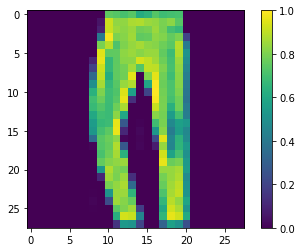

In [20]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Observamos que parece ser un pantalón, que corresponde a la 'Categoría 1' de nuestra clasificación: 'Trouser'.

In [32]:
print("----------------------------------------------------------")
print("PREDICCIONES CASO 1: ")
prediction1 = model1.predict(test_images)
prediction1[5]
np.argmax(prediction1[5])

----------------------------------------------------------
PREDICCIONES CASO 1: 
313/313 [==============================] - 4s 13ms/step


1

In [33]:
print("----------------------------------------------------------")
print("PREDICCIONES CASO 2: ")
prediction2 = model2.predict(test_images)
prediction2[5]
np.argmax(prediction2[5])

----------------------------------------------------------
PREDICCIONES CASO 2: 
313/313 [==============================] - 11s 34ms/step


1

In [34]:
print("----------------------------------------------------------")
print("PREDICCIONES CASO 3: ")
prediction3 = model3.predict(test_images)
prediction3[5]
np.argmax(prediction3[5])

----------------------------------------------------------
PREDICCIONES CASO 3: 
313/313 [==============================] - 11s 34ms/step


1

7. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el 
modelo para cada uno de los 3 casos con las 14 primeras imágenes del 
conjunto de test. Reflexione y comente las diferencias que observa. **texto en negrita** 

Incluimos las funciones necesarias en las siguientes líneas de código:

In [35]:
# PRIMERA FUNCIÓN:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres[predicted_label],
                                100*np.max(predictions_array),
                                nombres[true_label]),
                                color=color)

# SEGUNDA FUNCIÓN:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

De esta manera, a continuación se expondrán los pares de imágenes-gráficas de las primeras 14 imágenes del conjunto de test.

Los modelos calculan la probabilidad con la que una imagen se corresponde a una determinada clasificación, como ya hemos visto en las predicciones de la quinta imagen. Por consiguiente, puede que prediga perfectamente bien (100% probabilidad) una etiqueta; o, por el contrario, pueden aparecer otras probabilidades de posibles etiquetas (80%; 20%; 10%; 10%; por ejemplo).

Esta idea se representará con ayuda de distintos colores que se verán en las gráficas:

* verde = valores menores del las otras prediciones.
* rojo = el valor interpretado por el modelo.
* negro = el valor de la categoría real.

**Caso 1**

CASO  1
---------------------------------


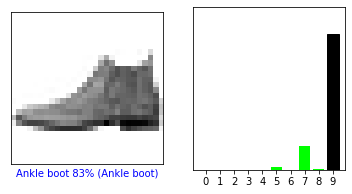




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

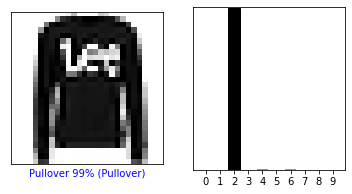




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

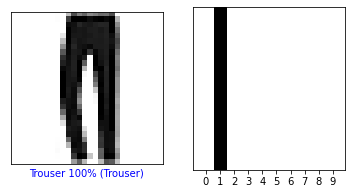




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

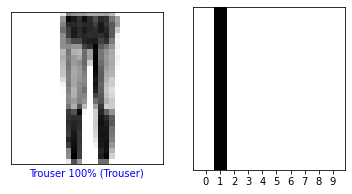




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

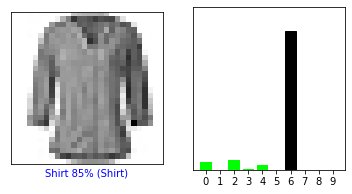




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

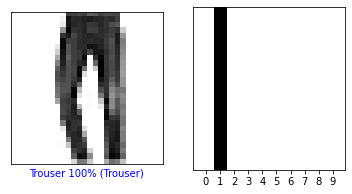




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

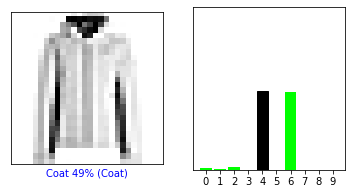




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

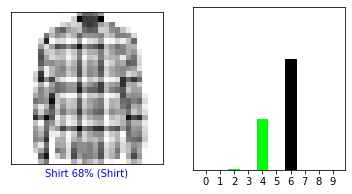




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

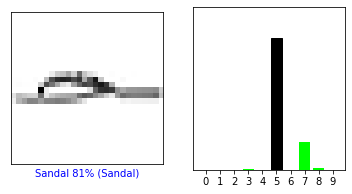




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

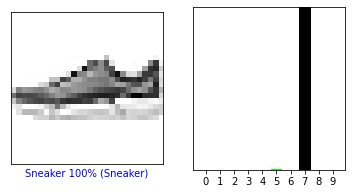




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

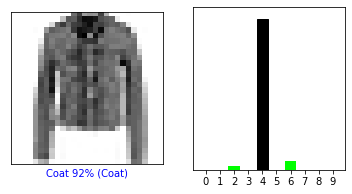




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

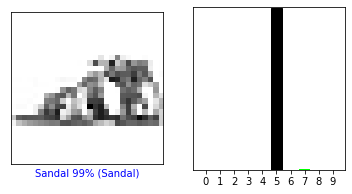




CASO  1
---------------------------------


<Figure size 432x288 with 0 Axes>

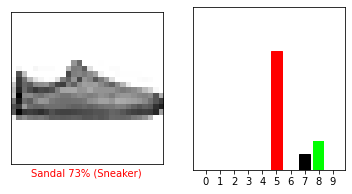




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

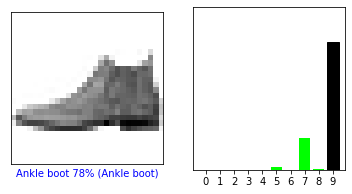




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

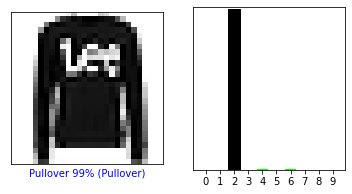




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

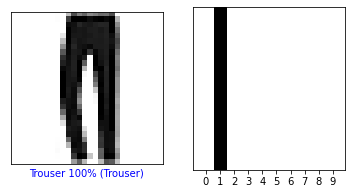




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

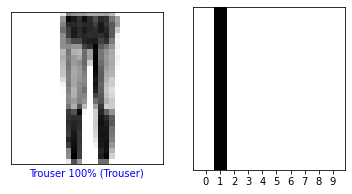




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

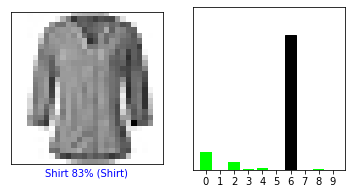




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

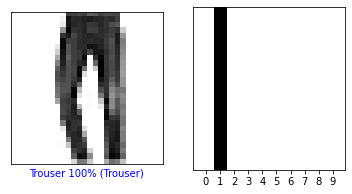




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

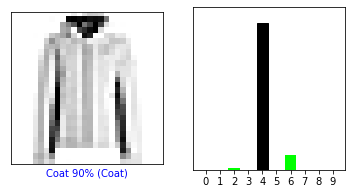




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

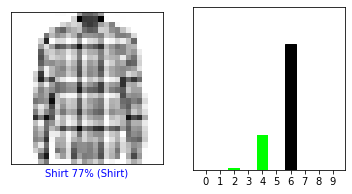




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

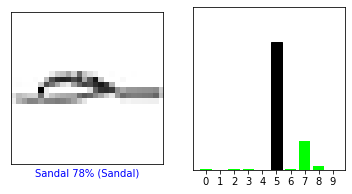




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

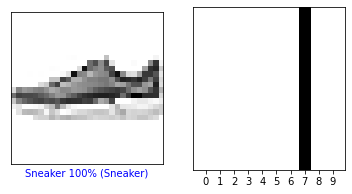




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

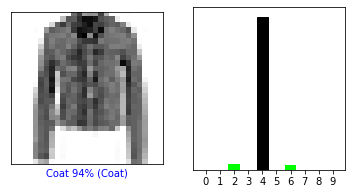




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

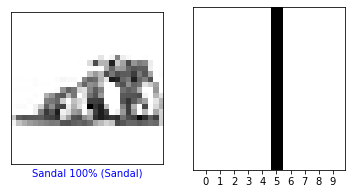




CASO  2
---------------------------------


<Figure size 432x288 with 0 Axes>

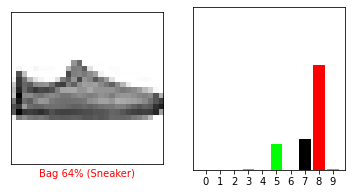




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

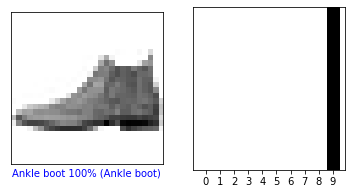




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

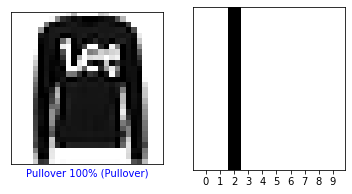




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

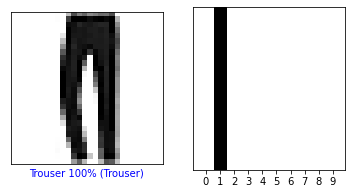




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

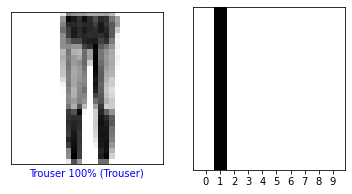




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

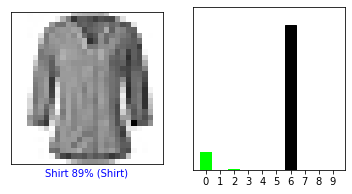




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

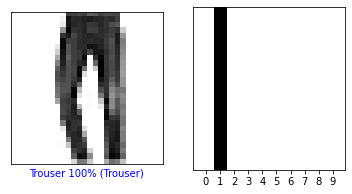




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

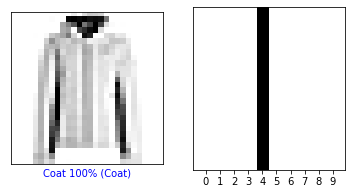




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

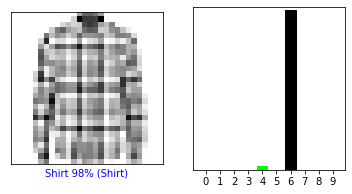




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

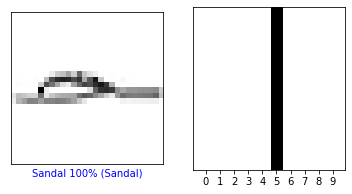




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

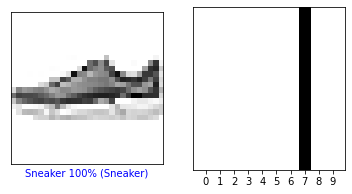




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

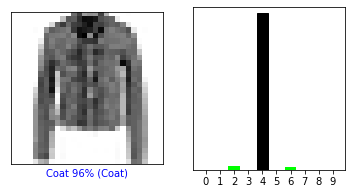




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

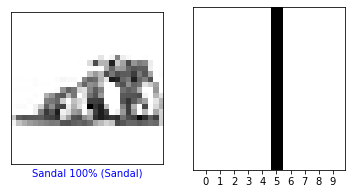




CASO  3
---------------------------------


<Figure size 432x288 with 0 Axes>

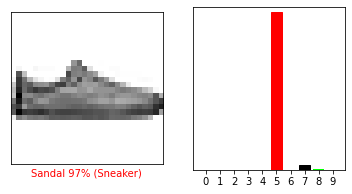

<Figure size 432x288 with 0 Axes>

In [39]:
predictions=[prediction1,prediction2,prediction3]
for caso in range(casos):
  for i in range(13):
    print("CASO ",caso + 1)
    print("---------------------------------")
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[caso][i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[caso][i],  test_labels)
    plt.show()
    plt.clf()
    print("\n\n")

* En el caso 1 hay un caso erróneo, el Sneaker y encontramos una mayor cantidad de franjas verdes por lo que el modelo duda de su respuesta y da la opción de que la respuesta sea otra.

* En el caso 2 hay un caso erróneo, al igual que el caso 1 es el Sneaker y encontramos una gran cantidad de franjas verdes pero menor que en el caso 1, por lo cual es ligeramente mejor.

* Por último en el caso 3, también falla el sneaker, sin embargo es más preciso que los anteriores, dado que hay menos probabilidades dudosas (franjas verdes).



**8. Hacer comparativa con los resultados que obtuvisteis en la práctica 1, con las 
capas Dense.**

Una vez realizado el análisis de los tres casos y obtenido una serie de resultados a partir de los datos proporcionados, podemos realizar una comparativa de los mismos con los obtenidos en la Práctica 1 realizada sobre esta misma base de imágenes.

En el caso de la Práctica 2, hemos realizado un análisis de tres Casos, mientras en que en el de la Práctica 1 realizamos un análisis de ocho.

Primero, vamos a comparar los resultados obtenidos en el Entrenamiento de los modelos. 

En el caso de la Práctica 1, se obtuvo que el Caso 8 los mejores resultados con los siguientes parámetros:
+   NÚMERO NEURONAS PRIMERA CAPA:  512
+   FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  sigmoid
+   FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
+   OPTIMIZADOR:  rmsprop
+   FUNCIÓN PÉRDIDA:  
+   sparse_categorical_crossentropy
+   MÉTRICA:  accuracy



Sin embargo, en el caso de la Práctica 2, se obtuvo que el Caso 3 dió los mejores resultados con los siguientes parámetros:
+   NÚMERO NEURONAS PRIMERA CAPA CONVOLUCIONAL:  64
+   FUNCIÓN ACTIVACIÓN PRIMERA CAPA CONVOLUCIONAL:  relu
+   PADDING PRIMERA CAPA CONVOLUCIONAL = same (es decir, para el paso 1, la salida será la misma que la entrada)
+   POOLING PRIMERA CAPA CONVOLUCIONAL: 2X2
+   NÚMERO NEURONAS SEGUNDA CAPA CONVOLUCIONAL: 128
+   FUNCIÓN ACTIVACIÓN SEGUNDA CAPA CONVOLUCIONAL: relu
+   PADDING SEGUNDA CAPA CONVOLUCIONAL = same (es decir, para el paso 1, la salida será la misma que la entrada)
+   POOLING SEGUNDA CAPA CONVOLUCIONAL: 2X2
+   NÚMERO DE NEURONAS EN LA PENÚLTIMA CAPA DENSA: 65
+   FUNCIÓN DE ACTIVACIÓN EN PENÚLTIMA CAPA DENSA: relu
+   FUNCIÓN ACTIVACIÓN ULTIMA CAPA CONVOLUCIONAL: softmax
+   OPTIMIZADOR:  adam
+   FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy
+   MÉTRICA:  accuracy

Al comparar los dos mejores modelos de ambas prácticas vemos que la precisión en la Práctica 1 es menor que en la Práctica 2 teniendo el mismo número de épocas, mientras que la pérdida es superior en la Práctica 1 que en la Práctica 2. 


A continuación, vamos a realizar una comparación de las Predicciones de de cada uno de los Casos en ambas prácticas en la Figura 5.

En la Práctica 1, podemos observar que al casi 100% la Figura 5 en seis de los ocho casos la identifica cómo un pantalón, mientras que en Caso 3 obtiene un 88%.

En el caso de la Práctica 2, podemos observar que la imagen 5 de las catorce pedidas se trata de una camiseta y en cada uno de los casos se obtiene un porcentaje de precisión diferente: 


+  Caso 1 (Imagen_5)=78%

+  Caso 2 (Imagen_5)= 83%

+  Caso 3 (Imagen_5) = 94%

Al contrario que en la Práctica 2, en cada uno de los ocho casos de la Práctica 1 no hay casos erróneos (franjas rojas), solo pequeñas probabilidades dudosas (franjas verdes) ya que debe de haber otra prenda de ropa similar.  

Algo en común que tienen las resoluciones de ambas prácticas es que identifican dentro de la categoría 7 (Sneakers) con un gran grado de error ya que en su predicción la identifica también dentro de la categoría 5 (Sandal).

**9. Ver los conceptos de batch_normalization y dropout y ver si se podría mejorar 
el modelo con ello.**

Antes de comenzar con su implementación en código, se comenzará introduciendo los términos y casos de uso de cada uno de los conceptos:

* *batch_normalization*: la idea principal es que se trata de aquella capa en la que se normalizan las entradas. De esta manera, dicha función aplica una transformación que mantiene la media de las salidas cerca de 0,y su desviación típica cerca de 1. Asimismo, cabe destacar que trabaja de diferente forma dependiendo de si se utiliza durante el entrenamiento o durante la evaluación:

  1. Durante el entrenamiento: la capa normaliza sus salidas usando la media y la desviación típica del conocido como 'batch' actual de entradas.
  2. Durante la evaluación: la capa normaliza sus salidas usando una media cambiante de la media y la desviación típica de aquellas 'batches' que haya visto en el periodo de entrenamiento.

Por ende, la capa normalizará únicamente sus salidas durante la evaluación, después de haber estado entrenándose con datos que contengan estadícticas similares a la de los datos de evalución.

Pasaremos los siguientes parámetros para el uso de la función:

* initialiter: sirve para determinar como se inicializan los sesgos antes de inicializar el modelo. El predeterminado es 0.

* une_bias: determina la aplicación del initialiter.

In [40]:
from keras import layers

In [41]:
print("CASO 1")
print("---------------------------------")
# CREAR EL MODELO DE RED NEURONAL CNN:
model1B = Sequential()
model1B.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1), use_bias=False)) # 1ª capa convolucional
model1B.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1B.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1B.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1B.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model1B.add(Dense(10, activation='softmax')) # Última capa densa

model1B.add(layers.BatchNormalization()) # Capa Batch Normalization

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1B.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1B.fit

model1B.fit(train_images, train_labels,
            epochs=5)

test_loss1B, test_acc1B = model1B.evaluate(test_images, test_labels)

CASO 1
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 90s 47ms/step - loss: 2.5810 - accuracy: 0.1019
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 88s 47ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 2.3026 - accuracy: 0.1000


In [ ]:
print("CASO 2")
print("---------------------------------")

# CREAR EL MODELO DE RED NEURONAL CNN:
model2B = Sequential()
model2B.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same',use_bias=False)) # 1ª capa convolucional
model2B.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2B.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2B.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2B.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model2B.add(Dense(65,activation='relu')) # Penúltima capa densa

model2B.add(Dense(10, activation='softmax')) # Última capa densa

model2B.add(layers.BatchNormalization()) # Capa Batch Normalization


# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2B.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model2B.fit

model2B.fit(train_images, train_labels,
            epochs=5)

test_loss2B, test_acc2B = model2B.evaluate(test_images, test_labels)

CASO 2
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 274s 146ms/step - loss: 2.4400 - accuracy: 0.1007
Epoch 2/5
1875/1875 [==============================] - 280s 149ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 263s 140ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 4/5
 499/1875 [======>.......................] - ETA: 2:44 - loss: 2.3026 - accuracy: 0.0973

In [ ]:
print("CASO 3")
print("---------------------------------")
# CREAR EL MODELO DE RED NEURONAL CNN:
model3B = Sequential()
model3B.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same',use_bias=False)) # 1ª capa convolucional
model3B.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3B.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3B.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3B.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model3B.add(Dense(65,activation='relu')) # Penúltima capa densa

model3B.add(Dense(10, activation='softmax')) # Última capa densa

model3B.add(layers.BatchNormalization()) # Capa Batch Normalization

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3B.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model3B.fit

model3B.fit(train_images, train_labels,
            epochs=5)

test_loss3B, test_acc3B = model3B.evaluate(test_images, test_labels)

Con estos modelos obtenemos de 0.10 en todos ellos. Sin embargo, en el caso 1 se obtiene en la primera época, mientras que en los demás se alcanza en la segunda época.

**Caso 1 (con use_bias='True' e inicializador)**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1BT = Sequential()
bias_initializer = tf.keras.initializers.HeNormal()
model1BT.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1),use_bias=True,bias_initializer=bias_initializer)) # 1ª capa convolucional
model1BT.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1BT.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1BT.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1BT.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model1BT.add(Dense(10, activation='softmax')) # Última capa densa

model1BT.add(layers.BatchNormalization()) # Capa Batch Normalization

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1BT.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1BT.fit

model1BT.fit(train_images, train_labels,
            epochs=5)

test_loss1BT, test_acc1BT = model1BT.evaluate(test_images, test_labels)

**Caso 2 (con use_bias='True')**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2BT = Sequential()
bias_initializer = tf.keras.initializers.HeNormal()
model2BT.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same',use_bias=True,bias_initializer=bias_initializer)) # 1ª capa convolucional
model2BT.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2BT.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2BT.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2BT.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model2BT.add(Dense(65,activation='relu')) # Penúltima capa densa

model2BT.add(Dense(10, activation='softmax')) # Última capa densa

model2BT.add(layers.BatchNormalization()) # Capa Batch Normalization



# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2BT.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model2BT.fit

model2BT.fit(train_images, train_labels,
            epochs=5)

test_loss2BT, test_acc2BT = model2BT.evaluate(test_images, test_labels)

**Caso 3 (con use_bias='True')**

In [ ]:

# CREAR EL MODELO DE RED NEURONAL CNN:
model3BT = Sequential()
bias_initializer = tf.keras.initializers.HeNormal()
model3BT.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same',use_bias=True,bias_initializer=bias_initializer)) # 1ª capa convolucional
model3BT.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3BT.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3BT.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3BT.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model3BT.add(Dense(65,activation='relu')) # Penúltima capa densa

model3BT.add(Dense(10, activation='softmax')) # Última capa densa

model3BT.add(layers.BatchNormalization()) # Capa Batch Normalization


# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3BT.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model3BT.fit

model3BT.fit(train_images, train_labels,
            epochs=5)

test_loss3BT, test_acc3BT = model3BT.evaluate(test_images, test_labels)

Obtenemos unos valores menores que los primeros modelos, además en todos ellos se obtiene una precisión máxima, aunque baja, en las primeras épocas y esta decrece a lo largo de las épocas posteriores, por lo que se produce sobre entrenamiento. Sin embargo son precisiones mayores que sin sesgar. Podría ser que con un inicializador diferente obtuvieramos mejores resultados. Y la función de perdida es menor.


* *dropout*: esta capa establece - de manera aleatoria - unidades de entrada a 0 con una fecuencia de una vez cada paso del tiempo de entrenamiento. Esto ayuda a prevenir el peligroso 'sobre entrenamiento', también conocido por su traducción inglesa como 'overfitting'. Aquellas entradas que no se establezcan como 0 se escalan hasta por "1/(1 - ratio)", de forma que la suma sobre todas las entradas permanece inalterada.

**Caso 1**

In [ ]:

# CREAR EL MODELO DE RED NEURONAL CNN:
model1D = Sequential()
model1D.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1D.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1D.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1D.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1D.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model1D.add(Dense(10, activation='softmax')) # Última capa densa

model1D.add(layers.Dropout(0.5)) # Capa Dropout

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1D.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model1D.fit

model1D.fit(train_images, train_labels,
            epochs=5)

test_loss1D, test_acc1D = model1D.evaluate(test_images, test_labels)

**Caso 2**


In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2D = Sequential()
model2D.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2D.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2D.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2D.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2D.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model2D.add(Dense(65,activation='relu')) # Penúltima capa densa

model2D.add(Dense(10, activation='softmax')) # Última capa densa

model2D.add(layers.Dropout(0.5)) # Capa Dropout



# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2D.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

history = model2D.fit

model2D.fit(train_images, train_labels,
            epochs=5)

test_loss2D, test_acc2D = model2D.evaluate(test_images, test_labels)

**Caso 3**

In [ ]:

# CREAR EL MODELO DE RED NEURONAL CNN:
model3D = Sequential()
model3D.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3D.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3D.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3D.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3D.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model3D.add(Dense(65,activation='relu')) # Penúltima capa densa

model3D.add(Dense(10, activation='softmax')) # Última capa densa

model3D.add(layers.Dropout(0.5)) # Capa Dropout


# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3D.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model3D.fit

model3D.fit(train_images, train_labels,
            epochs=5)

test_loss3D, test_acc3D = model3D.evaluate(test_images, test_labels)

Las ventajas de usar 'batch normalization' son parecidas a las ventajas ofrecidas por el uso de 'dropout'. Es posible usar ambos métodos al mismo tiempo; aunque lo recomendable es usar primero 'batch normalization' y después, si fuese necesario, aplicar 'dropout'. Por tanto, debido a que se ha comprobado la efictividad de cada método por separado, a continuación se emplearán ambas al mismo modelo. Analizaremos las diferencias visibles que se produzcan.

Con valores dropout obtenemos mejores precisiones que en los modelos con bach_normalitation. Sin embargo, siguen siendo valores menores que en los primeros modelos, lo que indica que deberíamos estudiar la respuesta de los modelos a variaciones en el porcentaje del dropout.

**Caso 3 (bach normalitation + dropout)**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3DD = Sequential()
model3DD.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3DD.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3DD.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3DD.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3DD.add(Flatten()) # Flatten no es una capa, sirve para aplanar

model3DD.add(Dense(65,activation='relu')) # Penúltima capa densa

model3DD.add(Dense(10, activation='softmax')) # Última capa densa

model3DD.add(layers.BatchNormalization()) # Capa Batch Normalization

model3DD.add(layers.Dropout(0.5)) # Capa Dropout
     

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3DD.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model3DD.fit

model3DD.fit(train_images, train_labels,
            epochs=5)

test_loss3DD, test_acc3DD = model3DD.evaluate(test_images, test_labels)

**10. Ver los conceptos de callbacks (Decaimiento del ratio de aprendizaje) y ver si se podría mejorar el modelo con ello.** 

Siguiendo la misma estructura que aquella del apartado anterior, se comenzará exponiendo las ideas generales de los conceptos de *callbacks*: Un 'callback' es un objeto capaz de llevar a cabo acciones en diferentes etapas del entrenamiento. Algunos ejemplos podrían ser su aplicación al comenzar o terminar una época ('epoch'), antes o después de un único 'batch',... Por ende, es posible aplicarlos en diversos momentos y con diferentes objetivos.

Al igual que en funciones anteriores existen diversos parámetros que podemos aplicar. Con el proposito de estudiar estos modelos hemos elegido el siguiente:

In [ ]:
tf.keras.callbacks.Callback()

In [ ]:
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

Esta funcion deja los primeros rangos de aprendizaje para las primeras 10 épocas, tras eso decrece de forma exponencial.

**Caso 1:**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model1F = Sequential()
model1F.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # 1ª capa convolucional
model1F.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model1F.add(Conv2D(64, (5, 5), activation='relu')) # 2ª capa convolucional
model1F.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model1F.add(Flatten()) # Flatten sirve para aplanar

model1F.add(Dense(10, activation='softmax')) # Última capa densa


# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model1F.compile(loss='sparse_categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

history = model1F.fit

model1F.fit(train_images, train_labels,
             epochs=5,callbacks=[callback])

test_loss1F, test_acc1F = model1F.evaluate(test_images, test_labels)

**Caso 2**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model2F = Sequential()
model2F.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model2F.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model2F.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model2F.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model2F.add(Flatten()) # Flatten sirve para aplanar

model2F.add(Dense(65,activation='relu')) # Penúltima capa densa

model2F.add(Dense(10, activation='softmax')) # Última capa densa

# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model2F.compile(loss='sparse_categorical_crossentropy',
                 optimizer='sgd',
                 metrics=['accuracy'])

history = model2F.fit

model2F.fit(train_images, train_labels,
             epochs=5, callbacks=[callback])

test_loss2F, test_acc2F = model2F.evaluate(test_images, test_labels)

**Caso 3**

In [ ]:
# CREAR EL MODELO DE RED NEURONAL CNN:
model3F = Sequential()
model3F.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1), padding='same')) # 1ª capa convolucional
model3F.add(MaxPooling2D((2, 2))) # 1ª capa pooling

model3F.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # 2ª capa convolucional
model3F.add(MaxPooling2D((2, 2))) # 2ª capa pooling

model3F.add(Flatten()) # Flatten para aplanar

model3F.add(Dense(65,activation='relu')) # Penúltima capa densa

model3F.add(Dense(10, activation='softmax')) # Última capa densa


# COMPILAR EL MODELO CON MÉTRICA PRECISIÓN:
model3F.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

history = model3F.fit

model3F.fit(train_images, train_labels,
             epochs=5, callbacks=[callback])

test_loss3F, test_acc3F = model3F.evaluate(test_images, test_labels)

Tras aplicar callback a los 3 modelos observamos que las precisiones de todos ellos son menores en comparación a los modelos iniciales.

### **Conclusiones**

En esta práctica hacemos uso de las capas convolucionales y pooling, que nos dan precisiones superiores al 86%.

En cuanto a la precisión de los 3 modelos con respecto a una imagen los 3 han sido entrenados favorablemente, pues han acertado la gran mayoría. Hemos visto que el mejor de los modelos es el modelo 3.

Asimismo, al aumentar las épocas del caso 1 se ha visto una importante mejora en el modelo, aunque no siempre aumentar las épocas implica un modelo mejor entrenado, en este caso es una buena opción.

En cuanto a las funciones explicadas anteriormente, batch normalization, dropout y bias se concluye que el modelo empeora considerablemente. Es posible que con otros parámetros (por ejemplo un dropout menor) u otro tipo de inicializadores de sesgo se obtengan mejores resultados. Nos gustaría destacar que los valores optenidos son sospechosos debido a su bajo valor de precisión.

Por ahora la mejor opción es el caso 1 con 25 épocas o el caso 3 con una menor precisión pero con menores épocas.

Por último, el uso de callback aporta una precisión ligeramente menor que en los modelos inicales, pero es una mejor opción ante el uso de bach_normalitation o bias o dropout(0.5).

### **Reflexiones**

Al igual que en el anterior proyecto, este apartado expone los acontecimientos y las dificultades que hemos encontrado como equipo durante su realización. Está compuesto por tres secciones fuertemente relacionadas entre sí:

**1. ¿Cómo hemos afrontado la solución de la práctica?**



Habiendo aprendido de la prática anterior ('Práctica 1'), y con el objetivo de mejorar los resultados obtenidos, tomamos algunas medidas nuevas con el fin de mejorar nuestro rendimiento.

Entre ellas destaca que empezamos a trabajar en ella con mayor tiempo de antelación, con el propósito de estar más preparadas ante posibles imprevistos y tener un mayor tiempo de reacción.

A su vez, hemos tenido más tiempo para aplicar detenidamente la segunda idea: trabajar primero el código de cada ejercicio, anotando únicamente algunos conceptos clave; y después, repasarlo d enuevo, centrándonos en la redacción de las observaciones y conclusiones encontradas.

Esta estructura y conceptos iniciales para atajar la práctica de manera más eficaz posible nos ha permitido alcanzar un buen conocimiento de las Redes de Neuronas Convolucionales y sus utilidades. A su vez, se ha podido lograr una mejor comprensión de la 'Práctica 1' (funcionamiento de las Redes de Neuronas Artificiales) debido a la necesidad de comparar ambos proyectos detenidamente.

**2. ¿Cómo se ha dividido el trabajo?**

Debido a la imposibilidad de trabajar con varios ordenadores al unísono, se han continuado con las distintas estrategias de la anterior práctica:

* Comenzamos estructurando el proyecto de una manera similar a la del proyecto previo, recopilando aquellos conceptos necesarios tanto antiguos como nuevos.
* Avanzamos en el trabajo a través de videollamadas. Esta herramienta permitía a una de nosotras compartir el código por la pantalla, mientras que las demás ayudábamos buscando soluciones con nuestros respectivos ordenadores para avanzar de manera conjunta y eficiente.
* Se comprobó el código en diferentes ordenadores con el propósito de encontrar posibles fallos en la compilación, o errores en la redacción.

**3. ¿Cómo se ha gestionado el equipo para trabajar?**

Siguiendo la línea argumental propuesta, teniendo en cuenta las similitudes de este apartado con el anterior y el carácter casi idéntico con respecto a la 'Práctica 1', explicaremos en más detalle las videollamadas mencionadas.

Nos asignábamos pequeñas tareas - que incluíamos en el proyecto mandándoselas a la compañera con el trabajo abierto, o esperando a incluirlas después - mientras avanzábamos con el código y las conclusiones con el fin de aprovechar el tiempo al máximo.

Sin embargo, también se utilizó tiempo en el que nos encontrábamos físicamente juntas para continuar.

### **Referencias Bibliográficas**

* Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula
* *https://keras.io/api/layers/normalization_layers/batch_normalization/*
* *https://keras.io/api/layers/regularization_layers/dropout/*
* *https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler*
* *https://keras.io/api/callbacks/*